In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [80]:
#plot number of merchant ships owned by country (beneficial ownership)

df = pd.read_csv("../input/UN/ships_over_time.csv",index_col=0)
df = df[df['FlagOfRegistration Label']=="Total all flags"]
df = df[df['BeneficialOwnership Label'].isin(["France","United Kingdom","Ireland"])].reset_index()
df["BeneficialOwnership"] = df["BeneficialOwnership"].replace('0000u',"0").astype("float")
df = df.groupby(["Year",'BeneficialOwnership Label'])["Number of ships"].sum().reset_index()

population = pd.read_csv("../input/population.csv")
population.columns = ["date", "uk_population", "ireland_population","france_population",]
population[["france_population", "ireland_population", "uk_population"]] = population[["france_population", "ireland_population", "uk_population"]] / 1000000
population["Year"] = [int(x[:4]) for x in population.date]
df = df.pivot(index='Year', columns='BeneficialOwnership Label', values='Number of ships').reset_index()
df.columns = ['Year', 'FR', 'IE', 'UK']

df = df.merge(population, on="Year",how="left")

df["UK_perc"] = df["UK"]/df["uk_population"]
df["FR_perc"] = df["FR"]/df["france_population"]
df["IE_perc"] = df["IE"]/df["ireland_population"]

df

,Year,FR,IE,UK,date,uk_population,ireland_population,france_population,UK_perc,FR_perc,IE_perc
0,2014,423.0,78.0,1211.0,2014-01-01,64.602298,4.657740,66.312067,18.745463,6.378929,16.746319
1,2015,444.0,90.0,1228.0,2015-01-01,65.116219,4.701957,66.548272,18.858589,6.671849,19.140966
2,2016,460.0,109.0,1311.0,2016-01-01,65.611593,4.755335,66.724104,19.981225,6.894060,22.921624
3,2017,446.0,113.0,1298.0,2017-01-01,66.058859,4.807388,66.918020,19.649144,6.664871,23.505488
4,2018,428.0,112.0,1315.0,2018-01-01,66.460344,4.867316,67.158348,19.786235,6.372998,23.010628
5,2019,428.0,113.0,1301.0,2019-01-01,66.836327,4.934340,67.388001,19.465462,6.351279,22.900732
6,2020,428.0,112.0,1327.0,2020-01-01,67.081234,4.985382,67.571107,19.781986,6.334068,22.465681
7,2021,415.0,115.0,1321.0,2021-01-01,67.026292,5.033164,67.764304,19.708684,6.124168,22.848451
8,2022,426.0,116.0,1342.0,2022-01-01,67.791000,5.127170,67.971311,19.796138,6.267350,22.624567
9,2023,440.0,111.0,1285.0,2023-01-01,68.350000,5.262382,68.170228,18.800293,6.454431,21.093110


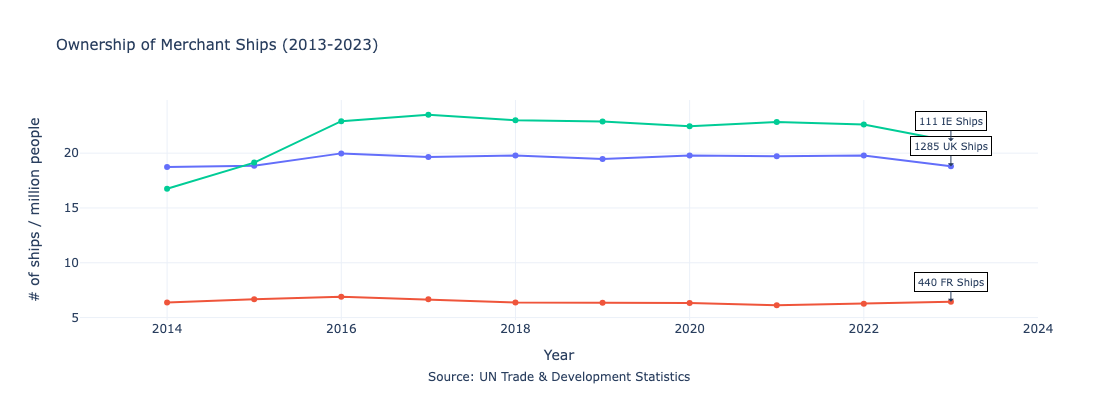

In [109]:

fig = go.Figure()


fig.add_trace(go.Scatter(x=df["Year"], y=df["UK_perc"], mode='lines+markers', name='UK'))
fig.add_trace(go.Scatter(x=df["Year"], y=df["FR_perc"], mode='lines+markers', name='France'))
fig.add_trace(go.Scatter(x=df["Year"], y=df["IE_perc"], mode='lines+markers', name='Ireland'))
annotations = []
for country in ['UK', 'FR', 'IE']:
    y_value = df.loc[df['Year'] == 2023, f'{country}_perc'].values[0]
    t = round(df.loc[df['Year'] == 2023, f'{country}'].values[0])
    annotations.append(
        dict(
            x=2023,
            y=y_value,
            xref="x",
            yref="y",
            text=f"{t} {country} Ships",
            showarrow=True,
            arrowhead=1,
            font=dict(size=10),
            ax=0,
            ay=-20,
            bgcolor='white', 
            borderpad=3,  
            bordercolor='black'  
        )
    )
    
fig.update_layout(
    title={'text':'Ownership of Merchant Ships (2013-2023)','font': {'size': 15} 
    },
    xaxis_title='Year',
    yaxis_title='# of ships / million people',
    legend_title='Country',
    template='plotly_white',
    hovermode='x unified',
    xaxis=dict(range=[2013, 2024]),  
    width=500, 
    height=400,   
    annotations=annotations,
    showlegend=False  
)


fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.add_annotation(
    text="Source: <a href='https://unctadstat.unctad.org/datacentre/dataviewer/US.FleetBeneficialOwners'>UN Trade & Development Statistics</a>",
    xref="paper", yref="paper",
    x=0.5, y=-0.30,
    showarrow=False,
    font=dict(size=12),
    xanchor='center'
)


fig.write_image("../output/Ownership of Merchant Ships (2013-2023).png")

fig.show()


In [108]:
pd.read_csv("../input/UN/ships.csv",index_col=0).sum(axis=1)

BeneficialOwnership_Label
France            1114.0
Ireland            276.0
United Kingdom    3678.0
dtype: float64